# Intro to R

As a demo of the language, plot sin and cos on the same axis:

In [1]:
# set up the default plot height and width (this is just for aesthetics)
library('repr')
options(repr.plot.width=6, repr.plot.height=5)

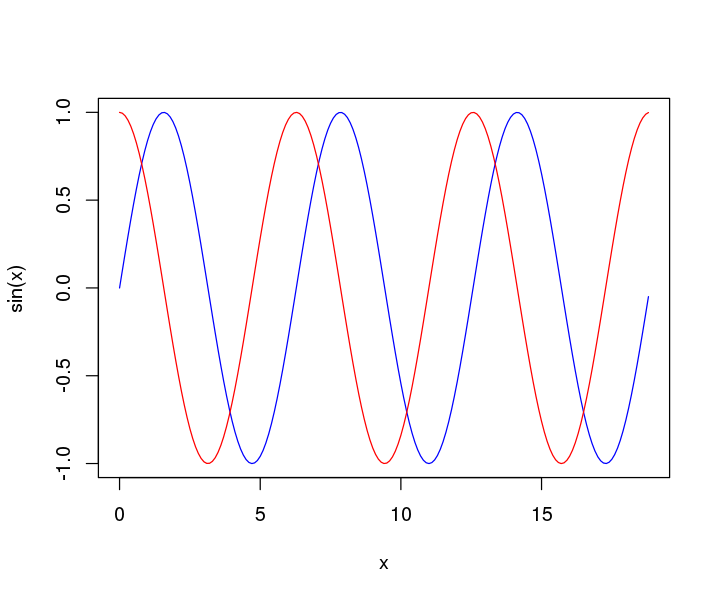

In [2]:
# define a sequence of points (start, end, by)
x = seq(0, 6*pi, 0.1)

# plot the sin of these points
plot(x, sin(x), type="l", col="blue")

# add a cos line to the plot
lines(x, cos(x), col="red")

# Netcdf

The easiest way to load and analyze NetCDF data in R involves the [ncdf4 package](https://cran.r-project.org/web/packages/ncdf4/ncdf4.pdf "ncdf4 Docs"). 

In [3]:
library('ncdf4')

data_url = 'http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc'
variable = 'AirTC_Avg'

ds = nc_open(data_url)

In [4]:
AirT.data = ncvar_get(ds, variable)
AirT.units = ncatt_get(ds, variable, 'units')$value

In [5]:
time.data = ncvar_get(ds, 'time')
time.units = ncatt_get(ds, 'time', 'units')$value
print(time.units)

[1] "seconds since 1970-01-01"


In [18]:
# convert the time to a date string
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

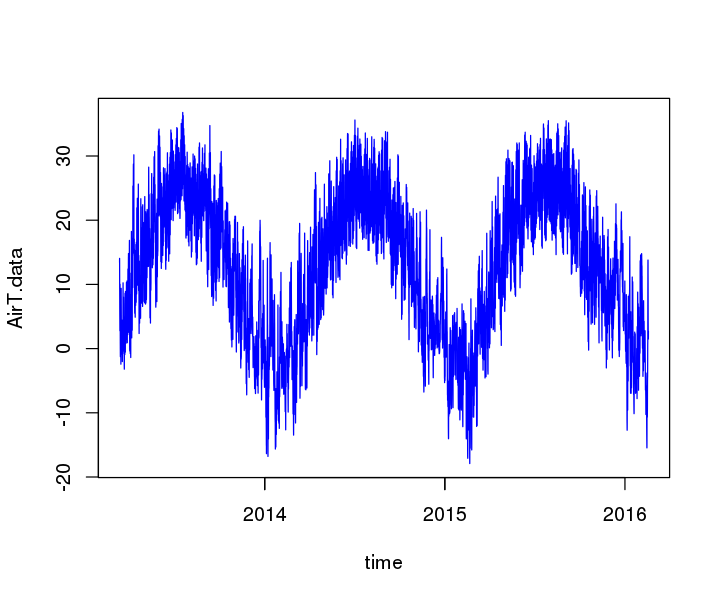

In [7]:
plot(time, AirT.data, type="l", col="blue")

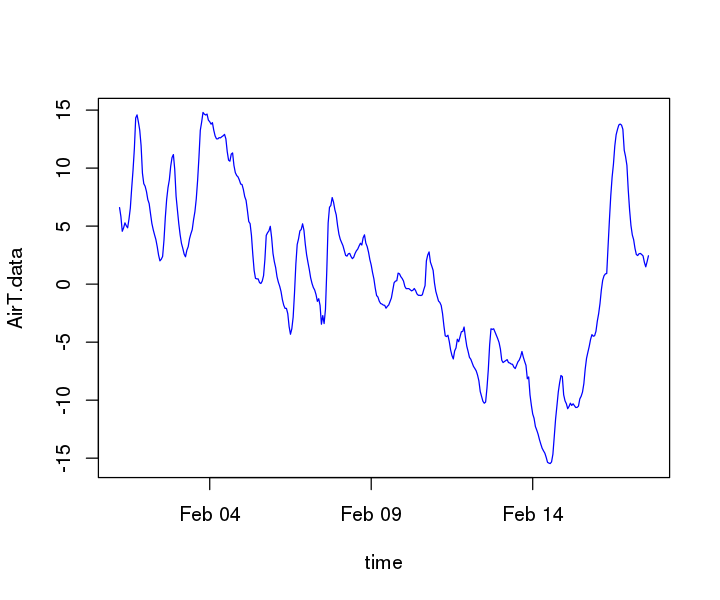

In [55]:
# define a dataframe with time as the names of the rows and air temp as the data
df = data.frame(time, AirT.data)

# select a slice using numerical indexers, and then plot that slice
slice = df[25100:25493,1:2]
plot(slice, type="l", col="blue")

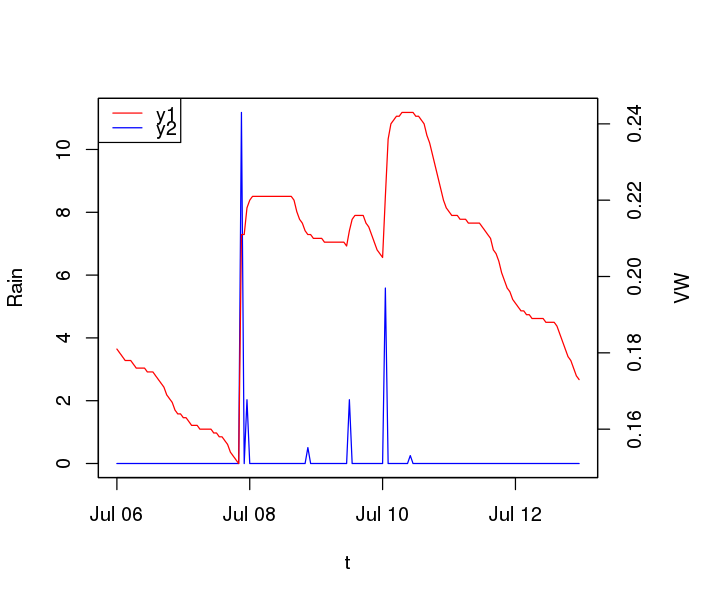

In [57]:
start = which(time=="2015-07-06")
count = which(time=="2015-07-13") - start

Rain = ncvar_get(ds,'Rain_mm_3_Tot', start, count)
VW = ncvar_get(ds,'VW', start, count)
t = time[start:(start+count-1)]

par(mar=c(5,4,4,5)+.1)
plot(t,Rain,type="l",col="blue")
par(new=TRUE)
plot(t, VW,type="l",col="red",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("VW",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("y1","y2"))